# Dependencias 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa


In [2]:
import os
CARPETA="./audio/"
piano_c_file = os.path.join(CARPETA,"piano_c.wav")
violin_c_file = os.path.join(CARPETA,"violin_c.wav")
sax_file = os.path.join(CARPETA,"sax.wav")
noise_file = os.path.join(CARPETA,"noise.wav")
debussy_file = os.path.join(CARPETA,"debussy.wav")
redhot_file = os.path.join(CARPETA,"redhot.wav")
scale_file = os.path.join(CARPETA,"scale.wav")
acoustic_guitar_file =os.path.join(CARPETA, "acoustic_guitar.wav")
brass_file = os.path.join(CARPETA,"brass.wav")
drum_set_file = os.path.join(CARPETA,"drum_set.wav")
voice_file = os.path.join(CARPETA,"voice.wav")

# Análisis

El análisis de una señal de audio persigue la extracción de alguna de sus características.

Hay fundamentalmente dos tipos de análisis:
- en el dominio del tiempo
- en el dominio de la frecuencia

https://towardsdatascience.com/decoding-the-symphony-of-sound-audio-signal-processing-for-musical-engineering-c66f09a4d0f5

# Segmentación de la señal en bloques (frames)

- La técnica habitual a la hora de analizar una señal es efectuar el análisis en bloques (FRAMES) separados por un número (HOP) de muestras. 
- El tamaño de los bloques FRAME y su separación HOP suelen ser un múltiplo de 2
- Si HOP<FRAME entonces los bloques se solapan


<img widht="300" height="200" src="./images/frame.jpg">






## Temporización de bloques (frames)

Dada un señal representada mediante $s_i$ muestras ($i=0,..,N-1$) recogidas con una frecuencia $sr$ tenemos que: 
- $i\cdot 1/sr$ es el instante de tiempo en el que se tomo la muestra $s_i$ es.

Si segmentamos la señal en $k=0,..T-1$ bloques de tamaño $F>=1$ separados por $H<=F$ muestras, tenemos que:
- $H\cdot j/sr$ es el instante de comienzo de la primera muestra del bloque $k$-ésimo

Los valores de $F$ y $H$ determinan:
- si hay solapamiento ($H<F$) o no entre bloques
- el número total $T$ de bloques en que se segmenta la señal
    - si $T=\lfloor \frac{N-F}{H}+1 \rfloor$ garantizamos que el último bloque tiene $F$ muestras, pero puede que queden muestras residuales no incluídas en el bloque último 
    - si $T=\lfloor \frac{N}{H} \rfloor$ es posible que el último bloque no esté completo (se puede optar por rellenar con muestras adicionales para completar) 

In [3]:
sr=2
N=10
F=4 
H=2

print(f"Tasa de muestreo SR={sr}")
print(f"Total muestras N={N}")
print(f"Tamaño bloque  F={F}")
print(f"Desplazamiento H={H}")

T = int((N-F)/H)+1
print(f"Número de bloques: {T}")
for k in range(T): 
    v0=k*H
    v1=k*H+F
    indices_muestras_en_frame=list(range(v0,v1))
    print(f">> Bloque k={k}: muestras con índices {indices_muestras_en_frame}")

print("--- Temporización de los índices ")
t_s=[(i,i/sr) for i in range(N)]
t_f=[(k,k*H/sr) for k in range(T)]
print("ts =",t_s)
print("tf =",t_f)

Tasa de muestreo SR=2
Total muestras N=10
Tamaño bloque  F=4
Desplazamiento H=2
Número de bloques: 4
>> Bloque k=0: muestras con índices [0, 1, 2, 3]
>> Bloque k=1: muestras con índices [2, 3, 4, 5]
>> Bloque k=2: muestras con índices [4, 5, 6, 7]
>> Bloque k=3: muestras con índices [6, 7, 8, 9]
--- Temporización de los índices 
ts = [(0, 0.0), (1, 0.5), (2, 1.0), (3, 1.5), (4, 2.0), (5, 2.5), (6, 3.0), (7, 3.5), (8, 4.0), (9, 4.5)]
tf = [(0, 0.0), (1, 1.0), (2, 2.0), (3, 3.0)]


## Librosa (frames_to_time) 

In [4]:
# https://librosa.org/doc/latest/generated/librosa.frames_to_time.html

sr=2
N=10
F=4 
H=2
print("--- Temporización con librosa")
t_samples=librosa.samples_to_time(range(N),sr=sr)
t_frames=librosa.frames_to_time(range(K),sr=sr,hop_length=H,n_fft=F)

print("Librosa ts =",t_samples)
print("Librosa tf =",t_frames)

--- Temporización con librosa


NameError: name 'K' is not defined

# Dominio temporal

## AE 

La AE (Envolvente de la amplitud) de una señal $s(i)$ segmentada en $k$ bloques de tamaño $F$, se calcula:
$$AE_k= \max_{i=kF}^{(k+1)F-1}s(i)$$


In [5]:
def representacion(signal,signal_1):
    plt.figure(figsize=(7,3))
    librosa.display.waveshow(signal,alpha=0.6,color="b")
    frames = range(0, len(signal_1))  
    t=librosa.frames_to_time(frames)
    plt.plot(t,signal_1,color="red")
    plt.show()

In [6]:
def amplitude_envelope(signal,frame_size=1024,hop_length=512):
    F=frame_size
    H=hop_length
    N=signal.shape[0]
    # OJO: El último bloque no necesariamente tiene F muestras, pero 
    # el Python admite rangos a[i:j] fuera del tamaño del array (devuelve lista vacía)  
    return np.array([max(signal[k:k+F]) for k in range(0, N, H)])


### Ejemplos

Forma de la señal (211680,)
Forma de la envolvente: (414,)


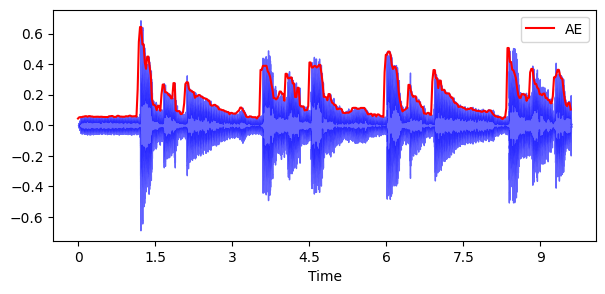

In [7]:
file_0= debussy_file
file_1= brass_file
file_2= drum_set_file
file_3= noise_file
file_4=acoustic_guitar_file
file_5= scale_file

file=file_4

FRAME_LENGTH = 1024
HOP_LENGTH = 512
signal,sr = librosa.load(file)
ae_signal=amplitude_envelope(signal,FRAME_LENGTH,HOP_LENGTH)
print(f"Forma de la señal {signal.shape}")
print(f"Forma de la envolvente: {ae_signal.shape}")

plt.figure(figsize=(7,3))
librosa.display.waveshow(signal,alpha=0.6,color="b")
frames = range(0, len(ae_signal))  
t=librosa.frames_to_time(frames)
plt.plot(t,ae_signal,color="red",label="AE")
plt.legend()
plt.show()

ipd.Audio(signal, rate=sr)

## RMS

La RMS (Root Mean Square) de una señal $s(i)$ segmentada en $k$ bloques de tamaño $F$, se calcula:

$$RMS_k=\sqrt{\frac{1}{F} \cdot \sum_{i=k \cdot F}^{(k+1)\cdot F-1}{s(i)^2}}$$



In [8]:
def rms(signal,frame_size=1024,hop_length=512):
    F=frame_size
    H=hop_length
    N=signal.shape[0]
    # OJO: El último bloque no necesariamente tiene F muestras, pero 
    # el Python admite rangos a[i:j] donde a[j] no existe 
    return np.array([np.sqrt((1/F)*(sum((signal[k:k+F])**2))) for k in range(0, N, H)])

### Ejemplos

Forma de la señal (661500,)
Forma de la RMS: (1292,)


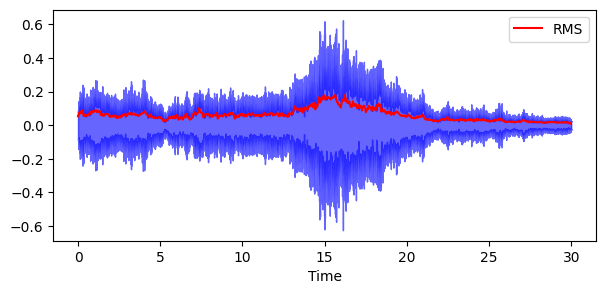

In [9]:
file_0= debussy_file
file_1= brass_file
file_2= drum_set_file
file_3= noise_file
file_4=acoustic_guitar_file
file_5= scale_file

file=file_0

FRAME_LENGTH = 1024
HOP_LENGTH = 512
signal,sr = librosa.load(file)
rms_signal=rms(signal,FRAME_LENGTH,HOP_LENGTH)
print(f"Forma de la señal {signal.shape}")
print(f"Forma de la RMS: {rms_signal.shape}")

plt.figure(figsize=(7,3))
librosa.display.waveshow(signal,alpha=0.6,color="b")
frames = range(0, len(rms_signal))  
t=librosa.frames_to_time(frames)
plt.plot(t,rms_signal,color="red",label="RMS")
plt.legend()
plt.show()

ipd.Audio(signal, rate=sr)

### Librosa (rms)

Forma de la señal (661500,)
Forma de la RMS: (1, 1292)


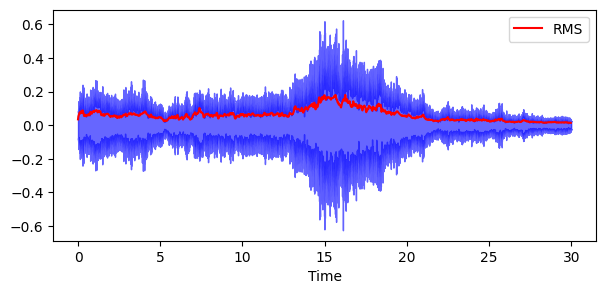

In [10]:
# https://librosa.org/doc/latest/generated/librosa.feature.rms.html

file_0= debussy_file
file_1= brass_file
file_2= drum_set_file
file_3= noise_file
file_4=acoustic_guitar_file
file_5= scale_file

file=file_0

FRAME_LENGTH = 1024
HOP_LENGTH = 512
signal,sr = librosa.load(file)
rms_signal=librosa.feature.rms(y=signal,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
print(f"Forma de la señal {signal.shape}")
print(f"Forma de la RMS: {rms_signal.shape}")

rms_signal=rms_signal[0]

plt.figure(figsize=(7,3))
librosa.display.waveshow(signal,alpha=0.6,color="b")
frames = range(0, len(rms_signal))  
t=librosa.frames_to_time(frames)
plt.plot(t,rms_signal,color="red",label="RMS")
plt.legend()
plt.show()

ipd.Audio(signal, rate=sr)

## ZCR

La ZCR (Zero Crossing Rate) de una señal $s(i)$ segmentada en $k$ bloques de tamaño $F$, se calcula:

$$ZCR_k=\sum_{i=k \cdot F}^{(k+1)\cdot F-1} \frac{1}{2} | \text{sgn($s(i)$)- sgn($s(i+1)$)}  |$$
donde la funcion signo se define: 

$$ \text{sgn($z$)}=\begin{Bmatrix} 
      1  &  z>0 \\
      0  &  z=0 \\
      -1 &  z<0
      \end{Bmatrix}$$

El resultado para cada bloque puede ser normalizado $ZCR_k/F$ para que sus valores estén entre [0,1]

In [11]:
def zcr(signal,frame_size=1024,hop_length=512):
    
    def cambios_de_signo(bloque):

        total=0
        for i in range(len(bloque)-1):
            if (bloque[i]*bloque[i+1]<0): 
                total+=1
        # Normalización entre 0 y 1 del resultado
        return total/frame_size


    F=frame_size
    H=hop_length
    N=signal.shape[0]

    # OJO: El último bloque no necesariamente tiene F muestras, pero 
    # el Python admite rangos a[i:j] donde a[j] no existe 
    return np.array([cambios_de_signo(signal[k:k+F]) for k in range(0, N, H)])

### Ejemplos

Forma de la señal (211680,)
Forma de la ZCR: (414,)


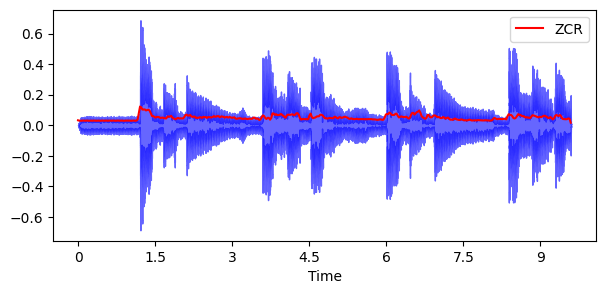

In [12]:
file_0= debussy_file
file_1= brass_file
file_2= drum_set_file
file_3= noise_file
file_4= acoustic_guitar_file
file_5= scale_file
file_6= voice_file

file=file_4

FRAME_LENGTH = 1024
HOP_LENGTH = 512
signal,sr = librosa.load(file)
zcr_signal=zcr(signal,FRAME_LENGTH,HOP_LENGTH)
print(f"Forma de la señal {signal.shape}")
print(f"Forma de la ZCR: {zcr_signal.shape}")


plt.figure(figsize=(7,3))
librosa.display.waveshow(signal,alpha=0.6,color="b")
frames = range(0, len(zcr_signal))  
t=librosa.frames_to_time(frames)
plt.plot(t,zcr_signal,color="red",label="ZCR")
plt.legend()
plt.show()

ipd.Audio(signal, rate=sr)

### Librosa (zcr)

Forma de la señal (211680,)
Forma de la ZCR: (1, 414)


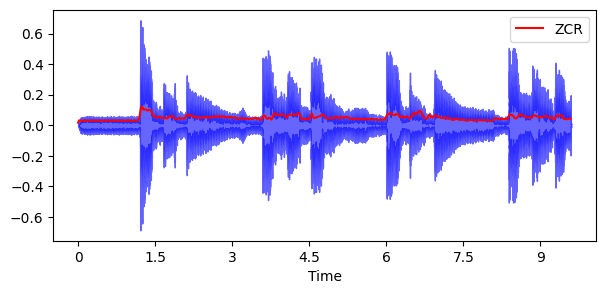

In [13]:
# Zero Crossing Rate
# https://librosa.org/doc/latest/generated/librosa.feature.zero_crossing_rate.html

file_0= debussy_file
file_1= brass_file
file_2= drum_set_file
file_3= noise_file
file_4=acoustic_guitar_file
file_5= scale_file

file=file_4

FRAME_LENGTH = 1024
HOP_LENGTH = 512
signal,sr = librosa.load(file)
zcr_signal=librosa.feature.zero_crossing_rate(y=signal,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
print(f"Forma de la señal {signal.shape}")
print(f"Forma de la ZCR: {zcr_signal.shape}")

zcr_signal=zcr_signal[0]

plt.figure(figsize=(7,3))
librosa.display.waveshow(signal,alpha=0.6,color="b")
frames = range(0, len(zcr_signal))  
t=librosa.frames_to_time(frames)
plt.plot(t,zcr_signal,color="red",label="ZCR")
plt.legend()
plt.show()


ipd.Audio(signal, rate=sr)

In [14]:


# Representación de ZCR no normalizada
plt.plot(t,zcr_debussy[0]*FRAME_LENGTH)
plt.plot(t,zcr_redhot[0]*FRAME_LENGTH)
plt.plot(t,zcr_duke[0]*FRAME_LENGTH)
plt.ylim(0,400)
plt.legend(["debussy","redhot","duke"])

plt.plot

NameError: name 'zcr_debussy' is not defined

In [8]:
signal=debussy+redhot+duke
signal=ae_debussy+ae_redhot+ae_duke
signal=rms_debussy+rms_redhot+rms_duke


plt.plot(signal)
ipd.Audio(signal,rate=sr)

NameError: name 'debussy' is not defined

# Dominio frecuencial

Existe una gran variedad de análisis que pueden realizarse a partir de un espectograma de la señal.
El espectograma colapsa la información de la señal tanto en las frecuncias como en el tiempo:
- las frecuencias colindantes se aglutinan franjas o intervalos (_bins_)
- el audio se segmenta temporalmente en bloques de muestras colindantes (frames). Es habitual que los bloques se solapen  

Adoptaremos la siguiente notación:
- $m_t(n)$ representa la magnitud de la señal en el intervalo de frecuencia $n$ en el bloque $t$
-  $N$ es el número de intervalos de frecuencia

- Spectral centroid
- Spectral flux
- Spectral spread
- Spectral roll-


<img width=600 height=200 src="./images/DomFrecFeatures.png">

https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html
https://librosa.org/doc/latest/generated/librosa.feature.spectral_rolloff.html

## BER

BER (Band energy ratio) compara la energía entre las bandas de frecuencia más altas y bajas. 

Dada una frecuencia $1<=F<=N$ 

$$ \text{BER}_t =  \frac{\sum_{n=1}^{F-1} m_t(n)^2}{\sum_{n=F}^{N}m_t(n)^2}$$

- La frecuencia $F$ divide las frecuencias en dos bandas: bajas (menores que F) y altas (mayores que F). 
- La decisión del valor de $F$ puede variar, aunque un valor típico suele ser en torno a 200. 
- El análisis compara la energía acumulada por las frecuencia _bajas_ (numerador) respecto de las _altas_ 
(denominador). 
- BER se emplea para:
    - distinguir si el contenido de un audio es musical o conversacional
    - diferenciar entre estilos musicales∫

<img width="400" height="200" src="./images/BER.png">

In [15]:
def ber(signal, split_freq, sample_rate, frame_size=1024, hop_length=512):

    # Compute the spectrogram of the signal
    spec = librosa.stft(signal, n_fft=frame_size, hop_length=hop_length)

    # Calculate the range of frequencies
    range_of_freq = sample_rate / 2
    # Calculate the change in frequency per bin
    change_per_bin = range_of_freq / spec.shape[0]
    # Calculate the bin corresponding to the split frequency
    split_freq_bin = int(np.floor(split_freq / change_per_bin))

    modified_spec = np.abs(spec).T
    res = []
    for sub_arr in modified_spec:
        # Compute the energy in the low-frequency range
        low_freq_density = sum(i ** 2 for i in sub_arr[:split_freq_bin])
        # Compute the energy in the high-frequency range
        high_freq_density = sum(i ** 2 for i in sub_arr[split_freq_bin:])
        # Compute the band energy ratio
        ber_val = low_freq_density / high_freq_density
        res.append(ber_val)
    return np.array(res)


### Ejemplos

Forma de la señal (211680,)
Forma de BER: (414,)


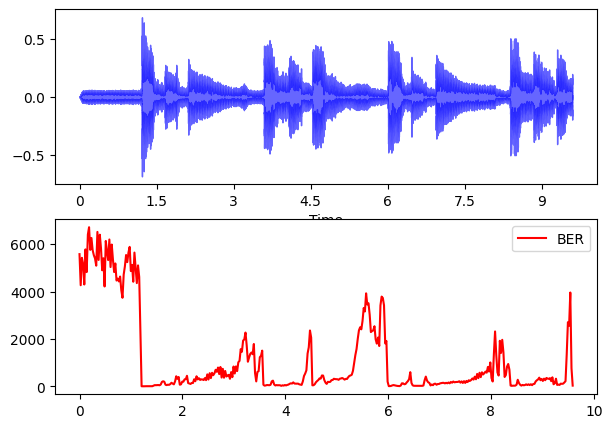

In [16]:
file_0= debussy_file
file_1= brass_file
file_2= drum_set_file
file_3= noise_file
file_4=acoustic_guitar_file
file_5= scale_file

file=file_4

FRAME_LENGTH = 1024
HOP_LENGTH = 512
split_freq=2000
signal,sr = librosa.load(file)
ber_spec=ber(signal,split_freq, sr,FRAME_LENGTH,HOP_LENGTH)
print(f"Forma de la señal {signal.shape}")
print(f"Forma de BER: {ber_spec.shape}")

plt.figure(figsize=(7,5))
plt.subplot(2,1,1)
librosa.display.waveshow(signal,alpha=0.6,color="b")
plt.subplot(2,1,2)
frames = range(0, len(ber_spec))  
t=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)
plt.plot(t,ber_spec,color="red",label="BER")
plt.legend()
plt.show()

ipd.Audio(signal, rate=sr)

## SC

SC (Spectral Centroid) nforma sobre donde se sitúa el centro gravitatorio de las magnitudes, i.e. la banda de frecuencias que concentra mayor energía. 

El análisis SC mide el nivel de _brillo_ de un audio.  

$$ \text{SC}_t =  \frac{\sum_{n=1}^{N} m_t(n)\cdot n}{\sum_{n=1}^{N}m_t(n)}$$

- El análisis compara la media ponderada de la energía (numerador) respecto de la energía total 
(denominador). 

## BW

BW (Band With) deriva del análisis SC

$$ \text{BW}_t =  \frac{\sum_{n=1}^{N} |n - \text{SC}_t| \cdot m_t(n)}{\sum_{n=1}^{N}m_t(n)}$$